<div align="center">

# Amazon Feedback Data Cleaning & Analysis  
### LLM Project — Amazon Product Reviews (RAG Preparation) 

I cleaned and prepared Amazon product review data to be used later in the LLM-based RAG system.  
The process includes **data cleaning**, **text preprocessing**, **visualization**, and **exporting the final dataset** for embedding storage.  

---

</div>


<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
Install and Import Dependencies
</h4>


In [1]:
pip install -U google-generativeai==0.7.2

  Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.38.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
streamlit 1.37.1 requires cachetools<6,>=4.0, but you have cachetools 6.2.1 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.2.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import os
from dotenv import load_dotenv
import google.generativeai as genai
from dotenv import load_dotenv
import requests
import json
from tqdm import tqdm  # progress bar
import re

<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
Load and Explore the Dataset
</h4>


In [10]:
df = pd.read_csv("amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

###### No missing values found

<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
Clean the Review Content
</h4>


In [6]:
df = df.dropna(subset=["review_content"])
df = df.drop_duplicates(subset=["review_content"])

df["review_content"] = (
    df["review_content"]
    .str.replace(r"http\S+", "", regex=True)   # remove links
    .str.replace(r"[^A-Za-z0-9\s.,!?']", " ", regex=True)  # remove special characters
    .str.strip()
)

print("Number of reviews after cleaning:", len(df))
print("\nRandom examples after cleaning:\n")
print(df["review_content"].sample(5).to_list())


Number of reviews after cleaning: 1212

Random examples after cleaning:

["Really happy that I chose this for my Mom. Made her life quite easier. We r a large family of 8   have used it only for kneading flour. It does the work its intended for,Very much helpful product easy to handle good to go for, product ,I m using this stand mixer for making cakes. It's great .,Used for making dough, it went well and it was quick one. May be due to its planetary motion, it's making sound than expected.,Very sturdy,Dough maker", "It's very easy to use we just need to handle it carefully it blends smoothly you just need to cut veggies or fruits into small pieces,My 1st use before I will putting to  charging in 4hrs.but it will work good now.let see how many days it will working!,Good,,Its easy to use,Build quality nice,Best product I use it and battery backup is too good you can use it 6 time of one time fully charged and smart features,", 'quality is ok ok only,Well go for it good cable,Useful prod

In [9]:
load_dotenv("key.env")

api_key = os.getenv("GEMINI_API_KEY")
print("API Key loaded:", api_key[:10], "...")  # show first 10 characters for verification

API Key loaded: AIzaSyCgaI ...


<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
Load API Key and Verify Connection
</h4>

In [10]:
# Download the key from the .env file
load_dotenv("key.env")
api_key = os.getenv("GEMINI_API_KEY")

# Google AI Studio API link
url = f"https://generativelanguage.googleapis.com/v1beta/models?key={api_key}"

response = requests.get(url)

if response.status_code == 200:
    print("Connection successful!")
    print(response.json())
else:
    print("There is a problem:")
    print("Status:", response.status_code)
    print(response.text)


Connection successful!
{'models': [{'name': 'models/embedding-gecko-001', 'version': '001', 'displayName': 'Embedding Gecko', 'description': 'Obtain a distributed representation of a text.', 'inputTokenLimit': 1024, 'outputTokenLimit': 1, 'supportedGenerationMethods': ['embedText', 'countTextTokens']}, {'name': 'models/gemini-2.5-pro-preview-03-25', 'version': '2.5-preview-03-25', 'displayName': 'Gemini 2.5 Pro Preview 03-25', 'description': 'Gemini 2.5 Pro Preview 03-25', 'inputTokenLimit': 1048576, 'outputTokenLimit': 65536, 'supportedGenerationMethods': ['generateContent', 'countTokens', 'createCachedContent', 'batchGenerateContent'], 'temperature': 1, 'topP': 0.95, 'topK': 64, 'maxTemperature': 2, 'thinking': True}, {'name': 'models/gemini-2.5-flash-preview-05-20', 'version': '2.5-preview-05-20', 'displayName': 'Gemini 2.5 Flash Preview 05-20', 'description': 'Preview release (April 17th, 2025) of Gemini 2.5 Flash', 'inputTokenLimit': 1048576, 'outputTokenLimit': 65536, 'supportedG

In [13]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)


TypeError: MessageToDict() got an unexpected keyword argument 'always_print_fields_with_no_presence'

###### This loads the **Gemini API key** securely from the `.env` file and checks the connection to ensure that the Google AI model is accessible

<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
 Initialize the Model and Prepare for Analysis</h4>

In [12]:
# 1- Load API key from .env file
load_dotenv("key.env")
api_key = os.getenv("GEMINI_API_KEY")
genai.configure(api_key=api_key)


# 2- Load dataset 
df = pd.read_csv("amazon.csv")

# Check if the review column exists
if "review_content" not in df.columns:
    print("Column 'review_content' not found! Check df.columns below:")
    print(df.columns)
else:
    print("Dataset loaded successfully!")
    print(f"Total reviews: {len(df)}")

Dataset loaded successfully!
Total reviews: 1465


In [14]:
# 3- Define model and analysis function 
model = genai.GenerativeModel("models/gemini-2.5-pro")


def analyze_review(review):
    prompt = f"""
    You are a precise JSON generator for customer feedback analysis.
    Extract the following information from the review text:
    - Complaints
    - Suggestions
    - Positives

    Return the output ONLY as a valid JSON object like this:
    {{
      "complaints": [],
      "suggestions": [],
      "positives": []
    }}

    If a category is not mentioned, keep its list empty.
    Review: {review}
    """

    try:
        response = model.generate_content(prompt)
        text = response.text.strip()

        # Debug print
        print(" Raw model output:\n", text[:400], "\n")

        # Clean the response of ```json``` or redundant text
        text = re.sub(r"```json|```", "", text).strip()

        # Load JSON
        result = json.loads(text)

        # Ensuring the three keys are always available
        for key in ["complaints", "suggestions", "positives"]:
            if key not in result:
                result[key] = []

        return result

    except Exception as e:
        print("JSON parsing error:", e)
        return {"complaints": [], "suggestions": [], "positives": []}


In [15]:
# Try it with few rows
for i in range(3):
    review = df.iloc[i]["review_content"]
    result = analyze_review(review)
    print(f"Row {i} →", result)


 Raw model output:
 ```json
{
  "complaints": [
    "The charging speed is slower than the original iPhone cable.",
    "Product stopped working and required a replacement."
  ],
  "suggestions": [],
  "positives": [
    "Looks durable",
    "Charging is fine",
    "Charging is really fast",
    "Good product",
    "Satisfied with the quality",
    "Good quality",
    "Would recommend",
    "Cable is sturdy enough",
 

Row 0 → {'complaints': ['The charging speed is slower than the original iPhone cable.', 'Product stopped working and required a replacement.'], 'suggestions': [], 'positives': ['Looks durable', 'Charging is fine', 'Charging is really fast', 'Good product', 'Satisfied with the quality', 'Good quality', 'Would recommend', 'Cable is sturdy enough', 'Value for money']}
 Raw model output:
 ```json
{
  "complaints": [
    "The brand new cable was not charging initially.",
    "There was green paste/fungus inside the micro USB connector.",
    "Potential quality issues from the

In [6]:
# 4- Analyze all reviews safely with progress saving 

In [24]:
output_file = "analyzed_reviews_full.csv"

# If there is a previously saved file, we can start from there.
if os.path.exists(output_file):
    print("Found existing file! Loading progress...")
    df = pd.read_csv(output_file)
    start_index = len(df[df["complaints"].notna()])
    print(f"Resuming from review {start_index}")
else:
    print("Starting fresh analysis...")
    df["complaints"] = ""
    df["suggestions"] = ""
    df["positives"] = ""
    start_index = 0

save_every = 50  # Save every 50 reviews

for i in tqdm(range(start_index, len(df)), desc="Analyzing all reviews"):
    review = str(df.loc[i, "review_content"]).strip()
    if not review or review.lower() == "nan":
        continue

    try:
        result = analyze_review(review)
        df.at[i, "complaints"] = " | ".join(result.get("complaints", []))
        df.at[i, "suggestions"] = " | ".join(result.get("suggestions", []))
        df.at[i, "positives"] = " | ".join(result.get("positives", []))
    except Exception as e:
        print(f"Error at row {i}: {e}")
        continue

    # Save progress
    if (i + 1) % save_every == 0:
        df.to_csv(output_file, index=False)
        print(f" Progress saved at review {i+1}/{len(df)}")

# Final Save
df.to_csv(output_file, index=False)
print(" All reviews analyzed successfully! Results saved as 'analyzed_reviews_full.csv'")


Found existing file! Loading progress...
Resuming from review 1353


Analyzing all reviews:   1%|          | 1/112 [00:07<13:43,  7.42s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Facing a recurring voltage issue after installation.",
    "Technician charged for connection pipes.",
    "Connection pipes are not included with the 10L model."
  ],
  "suggestions": [
    "Requests help to permanently fix the voltage issue."
  ],
  "positives": [
    "Really satisfied with the geyser.",
    "Energy efficient.",
    "Value for money.",
    "Produ 



Analyzing all reviews:   2%|▏         | 2/112 [00:16<15:31,  8.46s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Cost is a little more compared to its competitors.",
    "After-sales support from LG local services center is grossly disappointing.",
    "Discrepancies on installation charges.",
    "The installation was expensive, costing 2651 instead of the advertised 1199 + Tax.",
    "The copper wire was missing from the package.",
    "Noisy at full speed fan mode."
  ],
  



Analyzing all reviews:   3%|▎         | 3/112 [00:28<18:24, 10.13s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Received only one compatible filter in a pack of two; the other was different and incompatible.",
    "Money was wasted on the incompatible item because the return window was over.",
    "Poor quality, suspected duplicate product that doesn't last more than one month.",
    "The product is very expensive for being a duplicate.",
    "Installation is difficult if yo 



Analyzing all reviews:   4%|▎         | 4/112 [00:42<21:01, 11.68s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It is broken and it is not useful.",
    "product is so so",
    "the plastic quality is not so good as per the price",
    "the magnet is not working",
    "The first one was not working",
    "the replacement was sent without box with a used piece",
    "The battery had water while I received it",
    "I don't like it the product it not working",
    "Not satisfi 



Analyzing all reviews:   4%|▍         | 5/112 [00:49<17:55, 10.05s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It takes repeated auto switch of and on sessions to cook Maggie.",
    "It is not usable to boil Eggs and other purpose like Cooker rice etc.",
    "U cannot cook or boil.",
    "Current consumption will be high."
  ],
  "suggestions": [
    "Top stand should be included in the item."
  ],
  "positives": [
    "Small and compact, literally the size of your hand.",
 



Analyzing all reviews:   5%|▌         | 6/112 [01:01<18:42, 10.59s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The original jar that came with the mixer grinder lasted only for 8-9 months."
  ],
  "suggestions": [],
  "positives": [
    "Grinds well",
    "Quality is very good",
    "Recommended for Sujata mixer grinder",
    "Worked seamlessly with Sujata mixers",
    "Has a better, taller design with locks that prevent spilling",
    "It is an original and genuine product 



Analyzing all reviews:   6%|▋         | 7/112 [01:12<18:31, 10.58s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "After 15 days 2 tubes stopped working.",
    "Waste of money.",
    "Fuses early.",
    "Crude finish.",
    "The grill is coming off from the sides.",
    "The reflector surface is bulging out and seems like it may break with heat.",
    "Replacement process was not as arranged; a refund was offered instead of a replacement.",
    "Item broke after some time.",
   



Analyzing all reviews:   7%|▋         | 8/112 [01:21<17:43, 10.22s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Heating fan is too small.",
    "Takes a very long time (3 hours) to heat a small 10x10 room.",
    "BTC feature does not help to warm the room quickly.",
    "Received a product that looked used and refurbished.",
    "Wheels were old, worn out, and do not rotate smoothly.",
    "Difficulty in moving the heater.",
    "Does not heat well, radiation of heat is very 



Analyzing all reviews:   8%|▊         | 9/112 [01:33<18:41, 10.89s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Water becomes so hot you can't put your hand in it.",
    "There is no provision for controlling the temperature.",
    "Water is either very hot or cold, not mixed.",
    "Switches immediately from hot to cold.",
    "Not able to use for the required purpose for kitchen.",
    "Water does not get hot at all.",
    "It's biggest weakness that there is no option to  



Analyzing all reviews:   9%|▉         | 10/112 [01:40<16:19,  9.60s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "No measuring cup was included as promised.",
    "Takes time to bake.",
    "The size is small."
  ],
  "suggestions": [
    "Would recommend this Waffle machine rather than spending high bucks on branded ones.",
    "Cook each waffle twice to make it more crispy.",
    "It is a good buy for beginners.",
    "Makes a great gift."
  ],
  "positives": [
    "Easy to  



Analyzing all reviews:  10%|▉         | 11/112 [01:46<14:05,  8.37s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Delivered without power plug",
    "It's small",
    "Body is poor quality",
    "Damaged"
  ],
  "suggestions": [],
  "positives": [
    "Best performance",
    "Best for medium room",
    "The product is durable",
    "Value for Money",
    "Very good product in this range",
    "The quality is good",
    "The air blow output is best"
  ]
}
``` 



Analyzing all reviews:  11%|█         | 12/112 [01:54<14:00,  8.41s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It's comparatively small in size.",
    "It might not work for someone who wants higher accuracy for very small weights (e.g., 5, 6, 10, 15 grams)."
  ],
  "suggestions": [],
  "positives": [
    "I like it.",
    "It's a good investment to be accurate about grams.",
    "Good accuracy.",
    "Nice product.",
    "Trustworthy product.",
    "Easy to use.",
    "Lig 



Analyzing all reviews:  12%|█▏        | 13/112 [02:02<13:26,  8.15s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Product was broken",
    "The wire is too small",
    "Metal used is too thin",
    "Product was dented upon delivery",
    "Cord was smaller in length",
    "It gets a bit overheated"
  ],
  "suggestions": [],
  "positives": [
    "Thik hai (Okay)",
    "Recommend the product",
    "Likes the product",
    "Good for the price range",
    "Very nice",
    "So far s 



Analyzing all reviews:  12%|█▎        | 14/112 [02:09<12:36,  7.72s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The red indicator light is not glowing since the purchase.",
    "Energy consumption is a little high.",
    "The flow pressure is low, making it unable to be used with a shower without a pressure motor."
  ],
  "suggestions": [
    "Opted for a local electrician for installation based on other reviews."
  ],
  "positives": [
    "Heating is quick.",
    "Caters to 



Analyzing all reviews:  13%|█▎        | 15/112 [02:16<12:35,  7.79s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Heats 5 liters of water in 15-20 minutes, which is a wastage of electricity and money.",
    "Very bad quality of wire and rod.",
    "The quality is a bit low.",
    "Cord length is too small."
  ],
  "suggestions": [],
  "positives": [
    "The product is just ok for the cost.",
    "Very faster",
    "Gud",
    "Nice"
  ]
}
``` 



Analyzing all reviews:  14%|█▍        | 16/112 [02:30<15:27,  9.66s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The steel quality could have been better.",
    "Neither the upper nor lower container has a handle.",
    "Containers are still hot after 15 minutes, making it difficult to open.",
    "Difficult for children to operate.",
    "369/- is bit expensive for 250ml capacity.",
    "I got rusted piece.",
    "Material quality is just upto the mark.",
    "Very thin stee 



Analyzing all reviews:  15%|█▌        | 17/112 [02:50<19:49, 12.52s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The product is suited for 4 cups, not 6 as advertised.",
    "The mokapot design is flawed for cleaning, requiring dismantling and leaving unhygienic residues.",
    "The brewing method (pressured water pushing through coffee in bulk) produces an inferior flavor.",
    "Some dissolved coffee goes back into the boiler water, wasting the remaining water.",
    "The g 



Analyzing all reviews:  16%|█▌        | 18/112 [02:58<17:32, 11.20s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Previous RO service guy charged excessively (500/- total)"
  ],
  "suggestions": [],
  "positives": [
    "Good quality",
    "Easy to use",
    "Value for money",
    "Good filter",
    "Excellent product at this price",
    "Cost-effective (125/- per piece)",
    "Enables self-service, saving on service charges",
    "Water quality is maintained",
    "Easy to in 



Analyzing all reviews:  17%|█▋        | 19/112 [03:07<16:34, 10.69s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "If you increase the heat the fabric gets damaged easily."
  ],
  "suggestions": [],
  "positives": [
    "Nice iron in this price.",
    "The product is good as usual.",
    "It helps to iron lite fabrics.",
    "It is used to iron shirts, jeans, cotton sarees, cotton pants.",
    "Product is good and easy to use.",
    "सुपर",
    "Good",
    "Awesome product",
   



Analyzing all reviews:  18%|█▊        | 20/112 [03:15<14:54,  9.72s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The product is not made of premium quality steel.",
    "The press doesn't work perfectly.",
    "The size is small, you can only make one cup."
  ],
  "suggestions": [],
  "positives": [
    "Easy-to-use",
    "Reasonable price",
    "Value for money",
    "Good fit and finish",
    "Good for 3 glasses of filter coffee",
    "Provides the original filter coffee ta 



Analyzing all reviews:  19%|█▉        | 21/112 [03:25<15:00,  9.89s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The snap pin connectors need to be manually pried open.",
    "Delivery options are not good.",
    "Agent was rude and refuse to provide door step delivery."
  ],
  "suggestions": [
    "Use a safety pin and YouTube to open the snap pin connectors."
  ],
  "positives": [
    "Costs 4 times less than the original part.",
    "Worked without issues on pureit classic 



Analyzing all reviews:  20%|█▉        | 22/112 [03:30<12:46,  8.51s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [],
  "positives": [
    "Best product",
    "Room gets warm within a few minutes",
    "Quality is nice",
    "Timer option is very useful",
    "Portable",
    "Works fine",
    "Small but effective",
    "Doesn't require much space"
  ]
}
``` 



Analyzing all reviews:  21%|██        | 23/112 [03:37<11:56,  8.06s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The cups don't have the measures on them."
  ],
  "suggestions": [],
  "positives": [
    "Easy to clean",
    "Better than plastic",
    "Great deal for the price",
    "Serves the purpose",
    "Nice quality",
    "Good quality",
    "Looks good",
    "Good for the price",
    "Decent quality",
    "Useful for daily measuring",
    "Value for money",
    "Sturdy" 



Analyzing all reviews:  21%|██▏       | 24/112 [03:46<11:52,  8.10s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Not so good",
    "Not suitable for Pureit Advance RO + MF"
  ],
  "suggestions": [],
  "positives": [
    "Value for money",
    "fits perfectly with the filter I have",
    "It is worth the purchase",
    "Very usefull product for reasonable price",
    "The filter Quality is good",
    "Good"
  ]
}
``` 



Analyzing all reviews:  22%|██▏       | 25/112 [03:55<12:21,  8.52s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [],
  "positives": [
    "Nice",
    "Good iron",
    "performance, look and shape is very good",
    "I like this product",
    "Working well now.",
    "Nice product",
    "Acch hai",
    "GOOD"
  ]
}
``` 



Analyzing all reviews:  23%|██▎       | 26/112 [04:05<12:48,  8.93s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "3Kw huge consumption.",
    "Control is only by flow of water, so you cannot set temperature.",
    "Wastage of water is a little more.",
    "The temperature doesn't remain constant.",
    "The water flow is very restricted.",
    "Lack of manual temp control."
  ],
  "suggestions": [],
  "positives": [
    "This instant electric water tap is awesome.",
    "This  



Analyzing all reviews:  24%|██▍       | 27/112 [04:17<13:56,  9.84s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Received a used product",
    "Very bad product",
    "Not for bathroom use",
    "Only provides lukewarm water",
    "No pipe clamps provided",
    "Missing accessories like pipe and clamps that other products include",
    "High voltage consumption (3 kw)",
    "Product is average"
  ],
  "suggestions": [
    "Check first if accessories like pipes and clamps are  



Analyzing all reviews:  25%|██▌       | 28/112 [04:32<15:50, 11.32s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Unclear when the cartridge needs to be replaced.",
    "Build quality could be improved.",
    "Frequent change of filter is a downside.",
    "Water spills when filling a glass.",
    "Top lid securing is not good and does not close firmly, leading to leakage.",
    "Container jar material gets scratches very easily while cleaning.",
    "PH level is not up to the 



Analyzing all reviews:  26%|██▌       | 29/112 [04:40<14:34, 10.54s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Noise is high and disturbing.",
    "It doesn't have an Auto cut-off function.",
    "Noise level is too much high."
  ],
  "suggestions": [],
  "positives": [
    "Best mixer as compared to flimsy 350w,750w models.",
    "Durable, used daily for 4 years for grinding coconut, dosa batter, dry chutney.",
    "Wonderful product and best value for money.",
    "Mom is 



Analyzing all reviews:  27%|██▋       | 30/112 [04:53<15:06, 11.05s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Noise levels are high",
    "A lid of small jar is not tighten properly"
  ],
  "suggestions": [
    "Noise level can be improved"
  ],
  "positives": [
    "Good product",
    "Value for money",
    "Grinds hard spices and achieves the desired result",
    "Great product with 750 W motor",
    "Handling very easy and good",
    "Budget friendly product",
    "Buil 



Analyzing all reviews:  28%|██▊       | 31/112 [05:00<13:31, 10.02s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [],
  "positives": [
    "Good product",
    "Recipient has not complained",
    "Very good for this price range",
    "Easy to use",
    "Looks nice",
    "Meeting the expectations",
    "Value for money"
  ]
}
``` 



Analyzing all reviews:  29%|██▊       | 32/112 [05:06<11:47,  8.84s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "very small"
  ],
  "suggestions": [
    "A temperature regulator would have been more useful."
  ],
  "positives": [
    "easy to clean",
    "easy to use",
    "Nice and satisfactory product",
    "handy",
    "kitchen friendly",
    "reasonable price",
    "value for money",
    "Suitable for 2-3 members",
    "Beautiful design",
    "good functionality",
    "go 



Analyzing all reviews:  29%|██▉       | 33/112 [05:17<12:16,  9.33s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "product is not useful",
    "it got broken while washing",
    "totally money wastage"
  ],
  "suggestions": [],
  "positives": [
    "good experience",
    "great product",
    "excellent quality",
    "fast and powerful blades"
  ]
}
``` 



Analyzing all reviews:  30%|███       | 34/112 [05:24<11:19,  8.71s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The product is average for grilling.",
    "It takes too much time for grilling."
  ],
  "suggestions": [],
  "positives": [
    "The product is worth it.",
    "Food was perfectly cooked.",
    "Awesome product for a family of 4-5 members.",
    "Worth the money.",
    "Easy to use.",
    "Sturdy product.",
    "Very easy to operate.",
    "Bakes and cooks in much 



Analyzing all reviews:  31%|███▏      | 35/112 [05:33<11:08,  8.69s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "For heavy clothes like cotton and linen it doesn't heat up that much.",
    "You have to press harder and it takes a lot of time for heavy clothes.",
    "Doesn't have that much heating capacity.",
    "Outlook not so good.",
    "The ironbox stopped working after 4 months of purchase.",
    "The product is not like earlier versions."
  ],
  "suggestions": [],
  "p 



Analyzing all reviews:  32%|███▏      | 36/112 [05:39<10:12,  8.06s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Didn't get warranty card",
    "No bill received",
    "No extra screw received",
    "Red and green lights work at the same time",
    "The product reviews are for a different item (Magnetic Spoon), not the Portable Instant Heater"
  ],
  "suggestions": [
    "The hot water outlet should be lengthened",
    "Amazon team should check for the issue with incorrect re 



Analyzing all reviews:  33%|███▎      | 37/112 [05:49<10:52,  8.71s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The weighing platform is slightly elevated from the base, and it's difficult to clean debris from in between."
  ],
  "suggestions": [
    "It could have a hook or a hole to hang it on the wall."
  ],
  "positives": [
    "Neat, lightweight device",
    "Responds without delay",
    "Single tap to change measurements, start up, or switch off",
    "Sleek design",
  



Analyzing all reviews:  34%|███▍      | 38/112 [06:05<13:05, 10.62s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The brush nozzle is not good, it breaks on sharp corners.",
    "Blower leaks air.",
    "Vacuum cleaning is average."
  ],
  "suggestions": [
    "Wish it had a little bit bigger storage box.",
    "The blower should have been designed like a tunnel to be used efficiently."
  ],
  "positives": [
    "The blower functionality is good.",
    "Worth buying for small  



Analyzing all reviews:  35%|███▍      | 39/112 [06:14<12:39, 10.40s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Automatic heating temperature is not good.",
    "The length of the power cord is not sufficient.",
    "Powercord length is really very small."
  ],
  "suggestions": [
    "Powercord should be longer, atleast 1.5 metre to 2 metre."
  ],
  "positives": [
    "Easy and quick heating",
    "Price is best in class",
    "Good warranty (1 year + 6 month additional)",
  



Analyzing all reviews:  36%|███▌      | 40/112 [06:22<11:18,  9.42s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It is very small, holding less than 6 heavy clothes.",
    "Not suitable for a family.",
    "Too small for home use.",
    "Size is smaller than expected.",
    "Material is not good.",
    "Poor value for the price.",
    "One of the bags was damaged."
  ],
  "suggestions": [],
  "positives": [
    "Very good for a single person.",
    "Good for travel.",
    "Va 



Analyzing all reviews:  37%|███▋      | 41/112 [06:31<11:16,  9.52s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The build quality is very poor.",
    "The product broke on the second use.",
    "The product is not sturdy.",
    "The handle broke after a week.",
    "It is too difficult to peel the tape.",
    "The stick is very delicate and broke.",
    "The handle of the product is of very poor quality.",
    "The handle of the roller was not easy to use."
  ],
  "suggestio 



Analyzing all reviews:  38%|███▊      | 42/112 [06:41<11:07,  9.54s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Sometimes gets heated when used for longer",
    "Bakwas"
  ],
  "suggestions": [],
  "positives": [
    "हम संतुष्ट है हम जादा से जादा श्रीखंड बनाने काम आता है कभी कभी केक, आईस्क्रीम बनाते है।",
    "Nice product",
    "easy to use",
    "Like this product",
    "Good product",
    "value for money",
    "Good product on this price"
  ]
}
``` 



Analyzing all reviews:  38%|███▊      | 43/112 [06:55<12:22, 10.76s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Only one pump works and the other one stopped working.",
    "Waste of money!",
    "Not value for money",
    "material is very weak",
    "Does not give a fine mist but a stream of small droplets.",
    "little pricey",
    "bottles are not quality product",
    "Very thin will break very quickly"
  ],
  "suggestions": [],
  "positives": [
    "Good 👍",
    "Prod 



Analyzing all reviews:  39%|███▉      | 44/112 [07:00<10:18,  9.09s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The mixer was split throughout the blender."
  ],
  "suggestions": [],
  "positives": [
    "Easy to make milkshakes and diet smoothies",
    "Useful",
    "Very good quality",
    "Very helpful",
    "Backup is good",
    "Easy to clean",
    "Portable",
    "Easy to carry",
    "Easy to use for traveling",
    "Good for travelling"
  ]
}
``` 



Analyzing all reviews:  40%|████      | 45/112 [07:07<09:33,  8.56s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It is delicate to calibrate the juicer to the motor.",
    "Cleaning the juicer sieve is little tough.",
    "Juicer assembly is not much easy.",
    "The noise of the juicer is too high."
  ],
  "suggestions": [],
  "positives": [
    "Good.",
    "Powerful and effortless.",
    "Very powerful and useful machine for daily use.",
    "Best quality.",
    "I LIKED S 



Analyzing all reviews:  41%|████      | 46/112 [07:14<08:53,  8.08s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The handle feels a bit lighter than the body, raising concerns about its durability under daily strain.",
    "The switch in the kettle is a bit wobbly.",
    "The packaging was not good and was opened at the time of delivery."
  ],
  "suggestions": [
    "The upper lid should be able to open more to the back for easier and more thorough washing."
  ],
  "positives 

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Instruction manual is an ebook which involves too many steps to get."
  ],
  "suggestions": [
    "The instruction manual could have been a hard copy.",
    "The top surface should have an arrow-type bump on the plastic to indicate where the holes are by touch."
  ],
  "positives": [
    "Easy to use",
    "Easy to clean",
    "Heat-resistant glass",
    "Internal  



Analyzing all reviews:  42%|████▏     | 47/112 [07:24<09:21,  8.64s/it]

 Progress saved at review 1400/1465


Analyzing all reviews:  43%|████▎     | 48/112 [07:38<10:47, 10.12s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Size is a bit small.",
    "Cord is a bit small.",
    "It smells like burning wire on first use.",
    "Cleaning is difficult as it can't be washed directly under a tap.",
    "Does not look sturdy enough.",
    "The top and lower heaters are not parallel if the sandwich is a little thick.",
    "There is no temperature control knob.",
    "The hook is on one side 



Analyzing all reviews:  44%|████▍     | 49/112 [07:45<09:56,  9.47s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The 6ltr storage is not sufficient for a single person.",
    "Water cools down very quickly.",
    "Doesn't have a temperature control knob."
  ],
  "suggestions": [],
  "positives": [
    "Value for money",
    "Easy to use",
    "Good water heating",
    "Build quality is good",
    "No extra noise",
    "Very minimal in look"
  ]
}
``` 



Analyzing all reviews:  45%|████▍     | 50/112 [07:54<09:28,  9.17s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "There is no timer or power button.",
    "Quality is not good and the finishing is not proper.",
    "Received a product with a lot of scratches and bad finishing.",
    "The replacement product also had vague finishing.",
    "Uncertain about the internal build quality.",
    "The auto-close system does not work."
  ],
  "suggestions": [
    "Check the product bef 



Analyzing all reviews:  46%|████▌     | 51/112 [08:02<08:50,  8.70s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The inside steel is a bit delicate.",
    "The cord length is too low."
  ],
  "suggestions": [],
  "positives": [
    "Potatoes were boiled properly.",
    "Easy to use.",
    "Easy to adjust temperature.",
    "Worth the price.",
    "Two-layered design.",
    "The outer black part looks shiny.",
    "The auto-off feature is working perfectly.",
    "Looks stylis 



Analyzing all reviews:  46%|████▋     | 52/112 [08:08<07:58,  7.98s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "makes too much noise",
    "The plastic quality is not as expected",
    "Not for long-lasting purpose",
    "Motor started sparking within 3 months",
    "Replacement of motor is still pending"
  ],
  "suggestions": [],
  "positives": [
    "It's okay, not too bad",
    "Product is good",
    "Juicer is very good",
    "Operating functions are good to use",
    "I 



Analyzing all reviews:  47%|████▋     | 53/112 [08:20<08:59,  9.14s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The plastic fan cover is made of very light quality plastic and can break easily.",
    "Cost-cutting is evident in the plastic build quality.",
    "The inlet pipe folds, which hampers water flow, and its quality is not up to the mark.",
    "The foam container is too small.",
    "The 6-month warranty period is too short.",
    "The machine produces high noise.", 



Analyzing all reviews:  48%|████▊     | 54/112 [08:28<08:32,  8.84s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Cord is a little short.",
    "The thin plastic lid may get broken.",
    "You can't open the lid single-handedly.",
    "It isn't easy to clean due to its designer shape on the inside.",
    "The base coating will fade soon.",
    "The area of the heating coil became visible after just a few days of purchase.",
    "Lower quality than expected."
  ],
  "suggestion 



Analyzing all reviews:  49%|████▉     | 55/112 [08:39<08:56,  9.41s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "There's no mechanism to hold the tank and bottom unit together, which can be a concern with little kids.",
    "The item stopped producing mist, water overflowed, and the item was damaged.",
    "No warranty number was issued to claim the warranty.",
    "Customer care promised a call back from service personnel, but there has been no response for almost a month."
 



Analyzing all reviews:  50%|█████     | 56/112 [08:49<09:09,  9.81s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Product is average.",
    "It is costly for its use.",
    "It is not effective to remove pet hair from clothes.",
    "Unclear what to do after the roll layers are completed.",
    "Lacks sufficient adhesive power.",
    "Bad product.",
    "Product is of no use."
  ],
  "suggestions": [
    "Would have preferred more adhesive power."
  ],
  "positives": [
    "Us 



Analyzing all reviews:  51%|█████     | 57/112 [09:02<09:39, 10.53s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Quality could be improved; finishing was very rough with edges not curved or smooth.",
    "The tablespoon is incorrectly marked as a teaspoon.",
    "The scoops are too large due to long handles, making them difficult to store inside containers.",
    "Broken on first use."
  ],
  "suggestions": [
    "Could provide graduations inside the cups.",
    "Could provid 



Analyzing all reviews:  52%|█████▏    | 58/112 [09:08<08:29,  9.44s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "bit noisy",
    "Look and feel is simple"
  ],
  "suggestions": [],
  "positives": [
    "amazing",
    "still the best in its segment",
    "happy with our purchase",
    "working amazing",
    "woking good",
    "heavy and trustable product",
    "can be used continuously for 30 min",
    "Jar and mixer body looks strong",
    "Noise level is also low",
    "Awes 



Analyzing all reviews:  53%|█████▎    | 59/112 [09:17<08:12,  9.28s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Product is of cheap quality.",
    "Batteries holder is loose, causing the device to turn on & off.",
    "As soon as the machine is switched on, the reading goes to a negative value, requiring the use of the TARE option to make it 0."
  ],
  "suggestions": [
    "Need to improve weight accuracy."
  ],
  "positives": [
    "Good",
    "Weight accuracy is good.",
   



Analyzing all reviews:  54%|█████▎    | 60/112 [09:23<07:05,  8.18s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [],
  "positives": [
    "Harish has explained and installed the unit perfectly.",
    "His service is good.",
    "Product is good and water taste is also good.",
    "Good product, easy installation process.",
    "Nice product.",
    "On time and proper installation by v-guard team.",
    "No issues so far.",
    "Raghvendra did a great job for ins 



Analyzing all reviews:  54%|█████▍    | 61/112 [09:31<06:47,  8.00s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The mixer is noisy.",
    "The jars lock and get jammed in the groove, making them difficult to unlock.",
    "The white color on the outer face is a drawback.",
    "The price was high at the time of purchase compared to a later offer."
  ],
  "suggestions": [],
  "positives": [
    "Nice product",
    "Best mixer at this price",
    "Good quality",
    "Easy to u 



Analyzing all reviews:  55%|█████▌    | 62/112 [09:40<06:56,  8.33s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The pair of steel beaters is of very poor quality.",
    "A rusty pair of beaters were delivered.",
    "The material of the beaters is questionable, possibly not actual steel."
  ],
  "suggestions": [
    "The quality of the beaters should be improved."
  ],
  "positives": [
    "The beating machine and the dough hooks are absolutely perfect.",
    "The product ju 



Analyzing all reviews:  56%|█████▋    | 63/112 [09:47<06:39,  8.15s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Not working properly",
    "Surface is not glossy",
    "Costly than similar items of other brands",
    "The glass on top is very fragile",
    "Amazon doesn't accept COD"
  ],
  "suggestions": [
    "Provide a call number to get it fixed"
  ],
  "positives": [
    "Good performance",
    "Very good induction",
    "Easy to work with",
    "Very lightweight",
     



Analyzing all reviews:  57%|█████▋    | 64/112 [09:58<07:07,  8.91s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Was not able to get the technician from the brand initially.",
    "The outer material quality is bad, very lame plastic.",
    "The machine malfunctions if water TDS is above 600, creating a weird thumping sound.",
    "When malfunctioning, it has very low water purification (less than 2 litres per hour) and the water tastes like cough syrup.",
    "A little bit o 



Analyzing all reviews:  58%|█████▊    | 65/112 [10:06<06:40,  8.53s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Not much durable",
    "Cannot close proper",
    "Both sides of the bin tend to bulge out when clothes are inside",
    "The lid might often slip inside the bin",
    "The material is flimsy",
    "Cardboard is not strong",
    "The side latch or handle stitched is not strong",
    "A box can't hold the weight when it's full",
    "Appears to be very weak",
    "M 



Analyzing all reviews:  59%|█████▉    | 66/112 [10:16<07:02,  9.19s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The steel part of the roti maker gets very hot and cannot be touched during use.",
    "The size is only 8 inches."
  ],
  "suggestions": [
    "The size should be bigger, like 9.5 inches, to make stuffed parathas more easily."
  ],
  "positives": [
    "Good and okay for the price.",
    "With practice, it can make fluffy rotis.",
    "It is worth having.",
    "C 

🔹 Raw model output:
 ```json
{
  "complaints": [
    "If you pierce the egg, it will outflow through the hole, and if you don't pierce it, the egg bursts.",
    "It is difficult to clean if you make anything other than boiled eggs.",
    "It has a non-removable heating plate which is difficult to clean if used for an omelet.",
    "The model was received with a broken power plug pin, making it unusable.",
    "The cle 



Analyzing all reviews:  61%|██████    | 68/112 [10:35<06:44,  9.18s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The material of bigger measuring cups is a bit thin and feels like cheaper quality.",
    "The edges of the handles for the cup sizing are way too sharp."
  ],
  "suggestions": [],
  "positives": [
    "The material of the smaller measuring spoons is thick and good quality.",
    "Recommended for regular cooking of variety items.",
    "Good to buy.",
    "Cheaper  



Analyzing all reviews:  62%|██████▏   | 69/112 [10:42<06:02,  8.44s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "it consumes much more time than expected"
  ],
  "suggestions": [],
  "positives": [
    "Work perfectly and amazingly",
    "Must buy for cloth lint",
    "It is so convenient",
    "It clean so easily",
    "easy to remove",
    "Works good",
    "Wire is also not very short",
    "Very nice",
    "easy to use",
    "good at this price",
    "Product is good",
   



Analyzing all reviews:  62%|██████▎   | 70/112 [10:52<06:15,  8.95s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Screws are bad if used for 1.5T A/C outdoor stand.",
    "Angular bolt supplied is not of good quality.",
    "Had to buy another 8 bolts from the market, costing an extra Rs. 140.",
    "Paint may remove after years."
  ],
  "suggestions": [],
  "positives": [
    "Nice product fit to the purpose.",
    "Stand is sturdy.",
    "Strong brackets easy to mount.",
    



Analyzing all reviews:  63%|██████▎   | 71/112 [11:00<05:50,  8.54s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [],
  "positives": [
    "Good looking with a special design",
    "Attractive look",
    "User-friendly",
    "Simple but very good",
    "Light weight",
    "Good for light usage",
    "Product is as good as expected",
    "Valuable product in its price range",
    "Easy to operate",
    "Easy to use",
    "Easy control",
    "Nice product"
  ]
}
`` 



Analyzing all reviews:  64%|██████▍   | 72/112 [11:04<04:55,  7.39s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Printed price is ₹ 260 but I have purchased at ₹ 325"
  ],
  "suggestions": [],
  "positives": [
    "Value for money",
    "Good product",
    "Genuine part",
    "Good and genuine product",
    "Authentic company product",
    "Cheaper price"
  ]
}
``` 



Analyzing all reviews:  65%|██████▌   | 73/112 [11:12<04:46,  7.35s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Doesn't work on fleece blankets.",
    "Adhesion is not very good.",
    "Plastic quality is very poor.",
    "Overall below average"
  ],
  "suggestions": [],
  "positives": [
    "It's easy to use",
    "one sheet for one dress",
    "Adhesion is ok",
    "It absorbs most of the lint in 2 or 3 attempts",
    "value for money",
    "It works fine, no hassles",
    



Analyzing all reviews:  66%|██████▌   | 74/112 [11:17<04:20,  6.86s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Broken lid",
    "Cable burning smell on first use"
  ],
  "suggestions": [
    "Cord length should be longer"
  ],
  "positives": [
    "The product quality is good",
    "Boils very fast",
    "Good size kettle",
    "Nice looking",
    "Value for money",
    "Nice product",
    "The cord length is well enough",
    "Easy to clean"
  ]
}
``` 



Analyzing all reviews:  67%|██████▋   | 75/112 [11:24<04:11,  6.81s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "One cutter got jammed after around 3 weeks.",
    "Unclear how to claim the warranty.",
    "Looks cheap."
  ],
  "suggestions": [],
  "positives": [
    "I like it.",
    "Quality has been considered well.",
    "Easy to use.",
    "Reasonable cost.",
    "Looks good.",
    "Makes less noise.",
    "Jars are light weight.",
    "Nice product.",
    "Good product." 



Analyzing all reviews:  68%|██████▊   | 76/112 [11:37<05:09,  8.60s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The chutney jar is too big for grinding small daily masala quantities."
  ],
  "suggestions": [
    "A smaller jar should have been provided, or an option to select one."
  ],
  "positives": [
    "Intact packaging.",
    "The motor and jars were shining.",
    "It works wonders.",
    "The dry grinder and chutney jars work well for various needs.",
    "Powerful a 



Analyzing all reviews:  69%|██████▉   | 77/112 [11:47<05:22,  9.22s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Received a used or renewed item instead of a new one.",
    "The iron had water still inside it.",
    "The plastic clips were half opened and the box was taped up.",
    "Water drips from the iron, wetting the cloth.",
    "Takes a long time to remove wrinkles.",
    "1380W is not enough for a cordless design as it loses heat quickly and takes time to reheat.",
   



Analyzing all reviews:  70%|██████▉   | 78/112 [12:03<06:17, 11.10s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The setup process with the app is tricky and the user manual is insufficient.",
    "The manual omits the need for both Bluetooth and WiFi for setup.",
    "WiFi connectivity gets lost sometimes.",
    "5GHz WiFi connection is not supported.",
    "The robot sometimes gets confused in certain areas, requiring a map reset.",
    "Mopping is average, described as 'li 



Analyzing all reviews:  71%|███████   | 79/112 [12:14<06:04, 11.04s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "A bit costly.",
    "The shape does not fit the desired installation space.",
    "The speed is a bit low.",
    "Less suction power."
  ],
  "suggestions": [
    "Provide a round version of the product.",
    "Allow for exchange or return."
  ],
  "positives": [
    "Reasonably good product.",
    "No problems faced after 1 year of use.",
    "Sound is normal.",
  



Analyzing all reviews:  71%|███████▏  | 80/112 [12:19<04:57,  9.28s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It's making more sound than expected."
  ],
  "suggestions": [],
  "positives": [
    "Really happy with the choice for my Mom.",
    "Made her life quite easier.",
    "It does the work it's intended for.",
    "Very much helpful product.",
    "Easy to handle.",
    "Good to go for.",
    "Nice product.",
    "It's great for making cakes.",
    "Making dough went 



Analyzing all reviews:  72%|███████▏  | 81/112 [12:29<04:50,  9.38s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "I am not satisfied this product"
  ],
  "suggestions": [
    "Wind size improve"
  ],
  "positives": [
    "Good quality fan",
    "Finish and colour was good",
    "They even gave a safety metal rope for added safety",
    "Good fan from bugget",
    "No Ani dast"
  ]
}
``` 



Analyzing all reviews:  73%|███████▎  | 82/112 [12:42<05:16, 10.55s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The power chord is too short.",
    "Outer plastic body is very fragile.",
    "Wire is too short.",
    "The waffle iron does not heat enough.",
    "Does not make the waffles in the time indicated by the light or the recipe."
  ],
  "suggestions": [
    "Check if the power wire length is sufficient for your use before you order.",
    "Be careful with the outer p 



Analyzing all reviews:  74%|███████▍  | 83/112 [12:50<04:48,  9.95s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Handles not stitched well.",
    "It is very lightweight.",
    "Only suitable for a small amount of clothes.",
    "Not very sturdy and durable.",
    "Not always free-standing.",
    "A little bit expensive."
  ],
  "suggestions": [
    "Should be handled with care."
  ],
  "positives": [
    "Good choice for those not looking for an expensive product.",
    "Dec 



Analyzing all reviews:  75%|███████▌  | 84/112 [12:56<04:00,  8.60s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Takes time to increase overall room temperature."
  ],
  "suggestions": [],
  "positives": [
    "Nice product for winter season",
    "Good product and price",
    "Fabulous device",
    "Good for students",
    "Gives proper heat",
    "Value for money",
    "Portable heater can be used anywhere",
    "Handy and easy to carry",
    "No extra wire, directly fits i 



Analyzing all reviews:  76%|███████▌  | 85/112 [13:14<05:07, 11.39s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Huge noise irritates use of the product",
    "The machine is too loud",
    "Paper bag is not good enough and tears easily",
    "Blower is average",
    "Sound is a bit high"
  ],
  "suggestions": [
    "The extensions could have been longer",
    "Make a device with a lower noise level"
  ],
  "positives": [
    "Liked the blower function",
    "Suction is stron 



Analyzing all reviews:  77%|███████▋  | 86/112 [13:26<05:04, 11.70s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [
    "It is good to sprinkle some oil on fish.",
    "Recommended for a family of 5 members."
  ],
  "positives": [
    "Nice purchase",
    "Easy to use and clean",
    "Cooks multiple items well (fries, chicken nuggets, drumsticks, samosas)",
    "Healthy cooking with no oil",
    "Precise digital touch screen options",
    "Settings can be changed 



Analyzing all reviews:  78%|███████▊  | 87/112 [13:34<04:19, 10.39s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Can't tilt down as much",
    "Remote is not provided",
    "Noise level is high",
    "White color gets dirty early"
  ],
  "suggestions": [
    "Change the tilt adjustment to a screw mechanism",
    "Should have different colour options"
  ],
  "positives": [
    "Good design",
    "Less noisy",
    "Good air through",
    "More than expected",
    "Worth for mon 



Analyzing all reviews:  79%|███████▊  | 88/112 [13:41<03:48,  9.53s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Works fine only for a month.",
    "Expensive"
  ],
  "suggestions": [],
  "positives": [
    "Good product",
    "Apt for IFB washing machine",
    "Useful for IFB washing machines",
    "Provider responds very fast",
    "Received the order within 2 days",
    "One of the best",
    "Extremely needful product"
  ]
}
``` 



Analyzing all reviews:  79%|███████▉  | 89/112 [13:53<03:53, 10.15s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Water had a smell after heating initially.",
    "Discoloration and dark lining appeared on the base of the kettle.",
    "The inside edges at the opening of the kettle are very sharp, posing a risk of cutting fingers during cleaning.",
    "The product stopped working after 6 months.",
    "There is not a big difference between the low and high temperature setting 



Analyzing all reviews:  80%|████████  | 90/112 [13:59<03:17,  8.98s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Catches dust very easily",
    "Motor is not good",
    "Fan gets slow within a year",
    "Motor was replaced within 2 months",
    "Another motor needs repair",
    "Noisy fan",
    "Slower speed",
    "Remote control spoils the fan operation"
  ],
  "suggestions": [
    "Include SS lining for the border for the brown design"
  ],
  "positives": [
    "Nice color 



Analyzing all reviews:  81%|████████▏ | 91/112 [14:06<02:56,  8.42s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Poor alignment between mug and top spring causes water stagnation and bitter coffee taste.",
    "Cannot make coffee using milk.",
    "Initially received a damaged product.",
    "The hot plate does not cut off automatically and must be switched off manually.",
    "Cannot reheat coffee as it will start the brewing process again."
  ],
  "suggestions": [],
  "posi 



Analyzing all reviews:  82%|████████▏ | 92/112 [14:12<02:32,  7.62s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "You're supposed to trim them as required, which is a minor hassle.",
    "The package seemed old and the bags looked a little yellowish."
  ],
  "suggestions": [],
  "positives": [
    "They perform as intended.",
    "Value for money.",
    "Suits my bullet model.",
    "Best bag available for the old style Eureka Forbes vacuum cleaner.",
    "Worked as it has to. 



Analyzing all reviews:  83%|████████▎ | 93/112 [14:22<02:37,  8.29s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The wick needs to be constantly removed and re-dipped in water to function, which is a lot of work.",
    "The product is smaller than it looked in the picture.",
    "It has to be plugged in to be used.",
    "The power switch stopped working within 5 days."
  ],
  "suggestions": [
    "For medical purposes, it is better to buy a genuine, higher-priced, and higher 



Analyzing all reviews:  84%|████████▍ | 94/112 [14:30<02:30,  8.36s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It is not suitable for warming up an entire room, only for the immediate surrounding area.",
    "The build is lightweight and the rods are not attached firmly.",
    "The top rod came off the hinges and stopped working in less than a month.",
    "Heating power is very poor."
  ],
  "suggestions": [],
  "positives": [
    "It is a very nice heater.",
    "Good pro 



Analyzing all reviews:  85%|████████▍ | 95/112 [14:43<02:45,  9.72s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Cord is too short"
  ],
  "suggestions": [],
  "positives": [
    "Good quality in this price range",
    "great quality",
    "easy to use",
    "Ok hai",
    "Good",
    "Light weight",
    "working good",
    "Good product value for money",
    "Mind-blowing performance",
    "superb",
    "worth for money"
  ]
}
``` 



Analyzing all reviews:  86%|████████▌ | 96/112 [14:52<02:30,  9.40s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "The battery holder is too narrow for eneloop aa rechargeable batteries.",
    "A battery got stuck in the battery compartment.",
    "The flimsy battery door cannot be closed.",
    "Have to hold and press the battery door while operating.",
    "The battery insertion process is not user-friendly.",
    "Not as strong and powerful to froth the coffee.",
    "Averag 



Analyzing all reviews:  87%|████████▋ | 97/112 [15:06<02:41, 10.76s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Stop working after few days",
    "It doesn't fit easily",
    "The filter falls off with little water pressure",
    "Fitting is a drawback for the product",
    "Filtered water pressure has reduced after using it for a couple of days",
    "Doesn't purify the tap water as described (TDS only reduced from 427 to 424)",
    "Old product received",
    "Inside seems 

 Progress saved at review 1450/1465


Analyzing all reviews:  88%|████████▊ | 98/112 [15:14<02:19,  9.93s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [
    "The batter should be in the right proportions and temperature to have a perfect waffle."
  ],
  "positives": [
    "Easy to carry",
    "Easy to make waffles",
    "Reasonable price",
    "Good product",
    "Small in size",
    "Very easy to use",
    "Easy to clean",
    "Suitable for small kitchens",
    "Ready to use within 4 minutes",
     



Analyzing all reviews:  88%|████████▊ | 99/112 [15:25<02:15, 10.44s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [],
  "suggestions": [
    "If you’re a home baker who just started off, you should buy this product."
  ],
  "positives": [
    "Whipping creams and making dough has been easier than ever.",
    "Value for money.",
    "Trustworthy brand.",
    "The blades are easy to detach and clean.",
    "Very useful product.",
    "Easy to use.",
    "Hassle-free product.",
    "No  



Analyzing all reviews:  89%|████████▉ | 100/112 [15:33<01:53,  9.48s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "No On/Off button, requires continuously pressing a button to operate.",
    "It is battery-operated with no charging cable connection available.",
    "Build quality appears to be flimsy, with cheap and delicate plastic.",
    "Seller promises cashback for 5-star reviews, which may make reviews not genuine.",
    "It does not come with batteries."
  ],
  "suggestio 



Analyzing all reviews:  90%|█████████ | 101/112 [15:41<01:41,  9.26s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Bad Bad product.",
    "Please don't buy.",
    "hot air flow range not so much"
  ],
  "suggestions": [],
  "positives": [
    "Very good product",
    "My Requirements fulfilled",
    "Very Nice Products",
    "Good quality",
    "It's doing the great job."
  ]
}
``` 



Analyzing all reviews:  91%|█████████ | 102/112 [15:48<01:23,  8.38s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Received a broken item.",
    "The pin and safety pins in the accessory box were damaged.",
    "It is only useful for small cuts like kids' clothes.",
    "It's not good for beginners.",
    "It's not that simple to stitch.",
    "The machine gets stuck in the middle of stitching."
  ],
  "suggestions": [],
  "positives": [
    "Liked the product overall.",
    "S 



Analyzing all reviews:  92%|█████████▏| 103/112 [15:58<01:20,  8.96s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "You need to sit next to it to feel the heat.",
    "The cord is too short.",
    "The jali (grill) gets heated.",
    "Leads to a high electricity bill (Rs. 500+ monthly).",
    "A bit costly.",
    "Only useful for very small rooms.",
    "Consumes a lot of energy.",
    "Does not blow heat far.",
    "Produces very little heat.",
    "Does not heat a room properl 



Analyzing all reviews:  93%|█████████▎| 104/112 [16:10<01:18,  9.85s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "It's not working even after 4 hours of charging",
    "The motor, blade are poor",
    "Doesn't perform",
    "The machine gets jammed every time",
    "Poor quality"
  ],
  "suggestions": [
    "never buy such product",
    "Pls not sell this time"
  ],
  "positives": []
}
``` 



Analyzing all reviews:  94%|█████████▍| 105/112 [16:19<01:07,  9.60s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Cord is small",
    "Makes sound while heating",
    "The lid got detached on a previous model",
    "Comes with a bigger plug that doesn't fit suitable sockets",
    "Plug size is not mentioned in the product description",
    "The kettle opening is not so wide"
  ],
  "suggestions": [
    "The cord could be half a foot longer",
    "The kettle should be provided  



Analyzing all reviews:  95%|█████████▍| 106/112 [16:28<00:56,  9.47s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Packaging was not enough to prevent damage.",
    "Did not use proper amazon packaging.",
    "Price is quite high according to size and capacity.",
    "Found some defects and scratch marks after a few days of use.",
    "The product is not available for re-purchase.",
    "Received a faulty product."
  ],
  "suggestions": [
    "Control knobs should have marked s 



Analyzing all reviews:  96%|█████████▌| 107/112 [16:37<00:46,  9.25s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Does not work as advertised",
    "Product fails to collect hair",
    "Suspects that positive ratings are fake or bought"
  ],
  "suggestions": [],
  "positives": []
}
``` 



Analyzing all reviews:  96%|█████████▋| 108/112 [16:48<00:39,  9.81s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Received product without spanner.",
    "It's a little spongy.",
    "The candles are okay, not quite good.",
    "Needs to be changed every 1-2 months due to its thickness."
  ],
  "suggestions": [
    "Price should be a little bit less."
  ],
  "positives": [
    "Excellent product.",
    "Very good and easy to install.",
    "Comes in separate sealed packets & a 



Analyzing all reviews:  97%|█████████▋| 109/112 [16:57<00:28,  9.46s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "the measuring cup was broken",
    "The screw on the bottom was not placed properly",
    "There was a gap between the bottom plate and the top portion",
    "the replacement came worst than the other one",
    "it is small more small than i expected"
  ],
  "suggestions": [
    "Only use sponges to clean the utensil that comes with the cooker",
    "Don't modify i 



Analyzing all reviews:  98%|█████████▊| 110/112 [17:05<00:18,  9.14s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Vibrates in vertical position on a plastic stool",
    "Needs a bigger plug point",
    "Price is a bit high",
    "The front part of the heater started to melt after 2 months",
    "The box gets heated, which may cause damage",
    "Body flaps are delicate and were not aligned well upon receipt",
    "Received a defective product"
  ],
  "suggestions": [
    "You  



Analyzing all reviews:  99%|█████████▉| 111/112 [17:14<00:09,  9.02s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Fan speed is very slow.",
    "Exhausts smoke very slowly.",
    "Connecting wire is too short."
  ],
  "suggestions": [
    "Fan speed could have been faster.",
    "Speed could have been a little bit more."
  ],
  "positives": [
    "Working fine.",
    "It does exhaust.",
    "Good quality.",
    "Best performance.",
    "Super."
  ]
}
``` 



Analyzing all reviews: 100%|██████████| 112/112 [17:24<00:00,  9.32s/it]

🔹 Raw model output:
 ```json
{
  "complaints": [
    "Temperature control is not perfect.",
    "The control knob does not return to its initial position after the cooking process is complete.",
    "There is no indicator option.",
    "The exterior metallic finish picks up finger marks and spots which are difficult to clean.",
    "The build quality is not good.",
    "It is overpriced for its build quality."
  ],
   

 All reviews analyzed successfully! Results saved as 'analyzed_reviews_full.csv'


<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
 Validate Extracted Columns</h4>

In [7]:
print("Complaints filled:", df["complaints"].notna().sum())
print("Suggestions filled:", df["suggestions"].notna().sum())
print("Positives filled:", df["positives"].notna().sum())

KeyError: 'complaints'

In [20]:
# 5- Check results preview 
df = pd.read_csv("analyzed_reviews_full.csv")
print(df[["review_content", "complaints", "suggestions", "positives"]].head(20))

                                       review_content  \
0   Looks durable Charging is fine tooNo complains...   
1   I ordered this cable to connect my phone to An...   
2   Not quite durable and sturdy,https://m.media-a...   
3   Good product,long wire,Charges good,Nice,I bou...   
4   Bought this instead of original apple, does th...   
5   It's a good product.,Like,Very good item stron...   
6   Build quality is good and it is comes with 2 y...   
7   Worth for money - suitable for Android auto......   
8   I use this to connect an old PC to internet. I...   
9   I ordered this cable to connect my phone to An...   
10  The cable is efficient in fast charging but in...   
11  Good product,long wire,Charges good,Nice,I bou...   
12  I am using it for 14 days now. The experience ...   
13  Definitely isn’t as good as the original cord ...   
14  Loosing charging cable of apple is costly affa...   
15  I like it 👍👍,Best charging power . I used this...   
16  Pros- xiomi 5a is best in b

<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
 Insight Extraction & Visualization
 </h4>

 In this step, the analyzed dataset is reloaded to extract the **most frequent words and patterns**  
from customer feedback (complaints, suggestions, and positives).  

Top Complaints: [('heating issue', 7), ('does not support 33w charging', 6), ('i didn’t like it. | works best when charging one device at a time.', 6), ('the charging speed is slower than the original iphone cable.', 4), ('possibly due to storage in a very humid place.', 4), ("gray uniformity isn't great", 4), ('bulky and hard', 4), ('charging speed decreased after 7 months. | the product is costly. | the wire is very hard to fold. | the product stopped working.', 4), ('didn’t work on iphone xr. | look-wise', 4), ('the brand new cable was not charging initially.', 3)]
Top Suggestions: [('it should be softer and thinner', 5), ("please don't raise prices.", 4), ('you can go for it if you have a tight budget.', 3), ('if you need more length better look other options.', 3), ('ott platforms', 3), ('and sports', 3), ('this phone may not be suitable for camera-heavy users or those who frequently perform heavy downloads.', 3), ('you need to use this before the cable starts wearing out.', 3), (

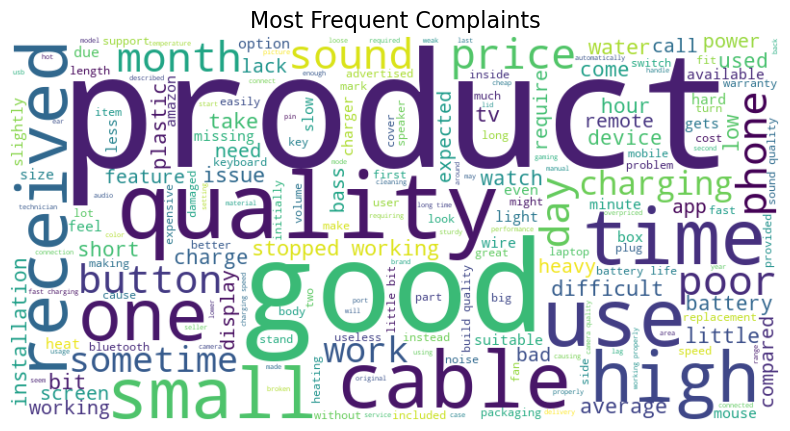

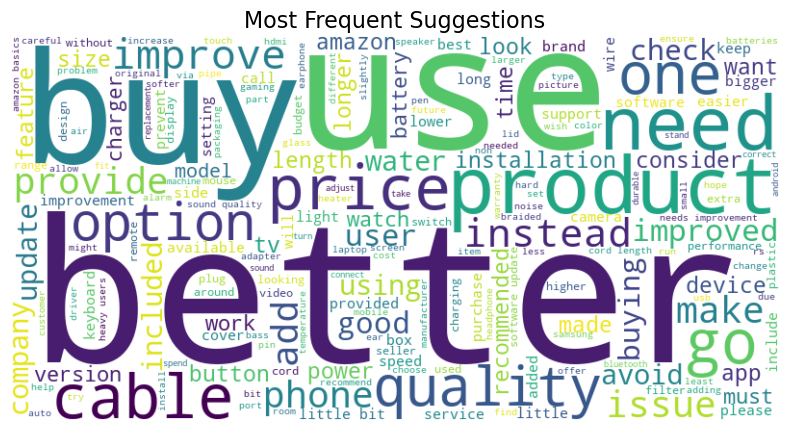

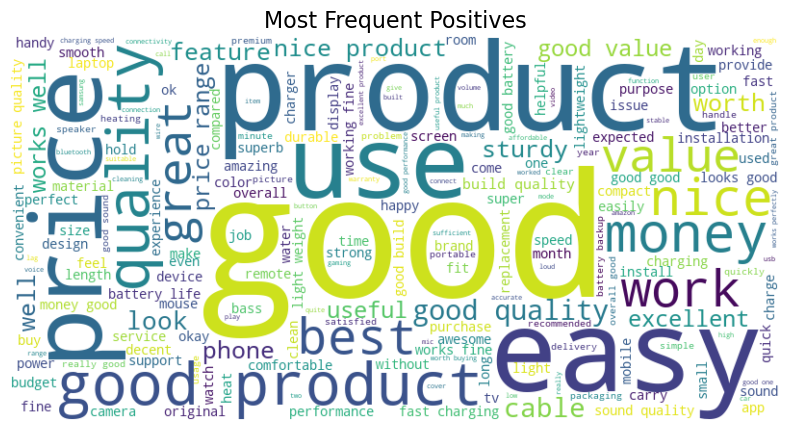

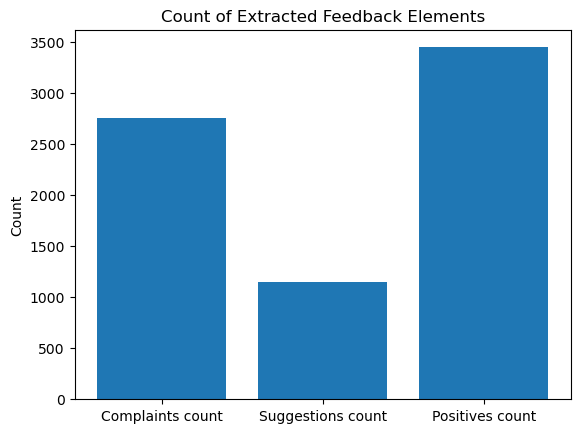

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Load the analyzed dataset
df = pd.read_csv("analyzed_reviews_full.csv")

#  Clean the data 
# Remove empty rows
df.dropna(subset=["complaints", "suggestions", "positives"], how="all", inplace=True)

#  Helper function to split text lists 
def split_and_flatten(column):
    stopwords = ["product", "item", "amazon", "good", "buy", "purchase", "thing", "one", "use", "used", "using", "like", "it","works"]
    words = []
    for row in df[column].dropna():
        for item in str(row).split(","):
            item = item.strip().lower()
            if len(item) > 2 and item not in stopwords:   # ignore short & common words
                words.append(item)
    return words

# Extract most common phrases 
complaints = split_and_flatten("complaints")
suggestions = split_and_flatten("suggestions")
positives = split_and_flatten("positives")

def get_top_words(word_list, top_n=10):
    return Counter(word_list).most_common(top_n)

print("Top Complaints:", get_top_words(complaints))
print("Top Suggestions:", get_top_words(suggestions))
print("Top Positives:", get_top_words(positives))

# Create word clouds for each category 
def create_wordcloud(words, title):
    if len(words) == 0:
        print(f" No data found for {title}")
        return
    text = " ".join(words)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

create_wordcloud(complaints, "Most Frequent Complaints")
create_wordcloud(suggestions, "Most Frequent Suggestions")
create_wordcloud(positives, "Most Frequent Positives")

# Basic counts summary 
summary = {
    "Complaints count": len(complaints),
    "Suggestions count": len(suggestions),
    "Positives count": len(positives)
}

plt.bar(summary.keys(), summary.values())
plt.title("Count of Extracted Feedback Elements")
plt.ylabel("Count")
plt.show()



<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
 RAG Initialization with ChromaDB
 </h4>

 To enable the chatbot to retrieve contextually relevant answers,i set up **ChromaDB**, a vector database for storing and retrieving embedded feedback.


In [22]:
pip install chromadb

  Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl (427 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires cachetools<6,>=4.0, but you have cachetools 6.2.1 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.0 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.2.0 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 6.33.0 which is incompatible.
Note: you may

<h4 style="background-color:#d9d9d9; color:#1e293b; padding:10px; border-radius:10px;">
Initialize ChromaDB and Activate Gemini Model
 </h4>


This step sets up the **ChromaDB vector database** and connects it with the **Gemini LLM model**  
to enable the **Retrieval-Augmented Generation (RAG)** workflow.  

- **ChromaDB Initialization:**  
  Creates a persistent vector store (`rag_storage`) where all review embeddings are saved for efficient retrieval.  
- **Gemini Model Activation:**  
  Loads the API key from the `.env` file and configures the `google-generativeai` client for use in analysis.  

With both components connected, the system is ready to process user queries,  
retrieve relevant customer feedback, and generate contextual answers.

In [1]:
import chromadb
from chromadb.utils import embedding_functions

# Force ONNX to use CPU only
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

client = chromadb.Client()
embedding_func = embedding_functions.DefaultEmbeddingFunction()

collection = client.get_or_create_collection(
    name="amazon_feedback",
    embedding_function=embedding_func
)

print("ChromaDB initialized successfully.")


✅ ChromaDB initialized successfully.


In [4]:
import chromadb
from chromadb.utils import embedding_functions

db_path = "./rag_storage"  # Fixed folder
client = chromadb.PersistentClient(path=db_path)

embedding_func = embedding_functions.DefaultEmbeddingFunction()

collection = client.get_or_create_collection(
    name="amazon_feedback",
    embedding_function=embedding_func
)

print("ChromaDB initialized and collection created.")


✅ ChromaDB initialized and collection created.


In [3]:
import google.generativeai as genai
from dotenv import load_dotenv

# Download Gemini key
load_dotenv("key.env")
genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

# Function to ask a question to the system
def ask_question(query):
    # Retrieve the top results
    results = collection.query(query_texts=[query], n_results=20)
    retrieved_docs = results["documents"][0]
    print(f"🔍 Retrieved {len(retrieved_docs)} documents for query: '{query}'")

    # Preparing the context and text
    context = "\n\n".join(retrieved_docs)
    prompt = f"""
    You are an assistant analyzing Amazon product feedback.
    Use the context below to answer the user's question accurately.

    Context:
    {context}

    Question: {query}

    Answer in a short, clear paragraph.
    """

    # Generating the answer from Gemini
    model = genai.GenerativeModel("models/gemini-2.5-pro")
    response = model.generate_content(prompt)
    return response.text

# Real test
example_question = "What do users complain about the most?"
answer = ask_question(example_question)

print("\nQuestion:", example_question)
print("Answer:", answer)


🔍 Retrieved 0 documents for query: 'What do users complain about the most?'

Question: What do users complain about the most?
Answer: Based on the feedback analysis, users complain most about the product's reliability and the quality of customer support. The most frequent issues are that the product suddenly stops working or charging. Additionally, customers mention the product's poor quality and express dissatisfaction with the customer service they receive when trying to resolve these problems.
